<a href="https://colab.research.google.com/github/DantheOPMan/cs-class/blob/main/Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 3

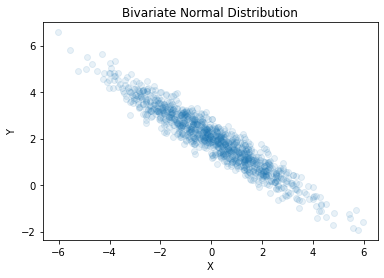

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the distribution
mean = [0, 2]
cov = [[0.3, -1], [-1, 5]]

# Generate the Cholesky factorization of the covariance matrix
L = np.linalg.cholesky(cov)

# Generate random samples from the standard normal distribution
samples = np.random.normal(0, 1, (1000, 2))
# Transform the samples to the desired distribution using the Cholesky factorization
samples = samples @ L + mean
# Plot the samples as a scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

# Define a grid of points to evaluate the distribution on
x, y = np.mgrid[-2:2:.01, -9:9:.01]
pos = np.dstack((x, y))

# Evaluate the bivariate normal distribution on the grid
z = np.exp(-0.5 * np.sum((np.dot(pos - mean, np.linalg.inv(cov)) * (pos - mean)), axis=2)) / (2 * np.pi * np.linalg.det(cov) ** 0.5)

# Plot the contour of the distribution
#plt.contour(x, y, z, 10, cmap='viridis')

# Add labels and title to the plot
#plt.axhline(y = -1, color = 'purple', linestyle = '-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Normal Distribution')

# Show the plot
plt.show()


Question 4

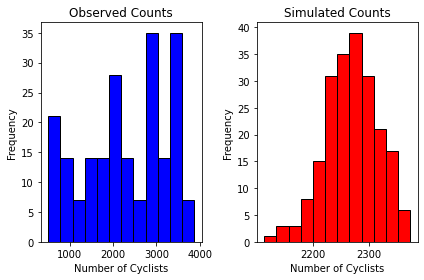

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a csv file
data = (pd.read_csv('/content/nyc-east-river-bicycle-counts.csv'))['Brooklyn Bridge']

# Plot the histogram of the observed counts
plt.hist(data, bins=20, edgecolor='black', alpha=0.7, label='Observed')

# Simulate the counts using the Poisson distribution
simulated = np.random.poisson(np.mean(data), len(data))

# Plot the histogram of the observed counts
plt.subplot(1, 2, 1)
plt.hist(data, bins=12, color='blue', edgecolor='black')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.title('Observed Counts')

# Plot the histogram of the simulated counts
plt.subplot(1, 2, 2)
plt.hist(simulated, bins=12, color='red', edgecolor='black')
plt.xlabel('Number of Cyclists')
plt.ylabel('Frequency')
plt.title('Simulated Counts')

plt.tight_layout()
plt.show()


Question 5


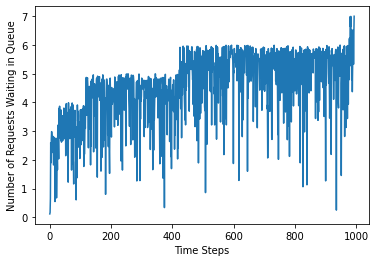

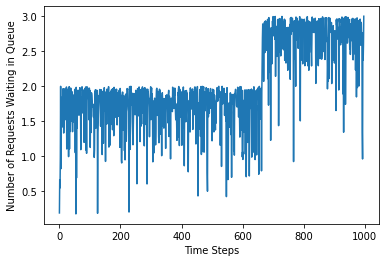

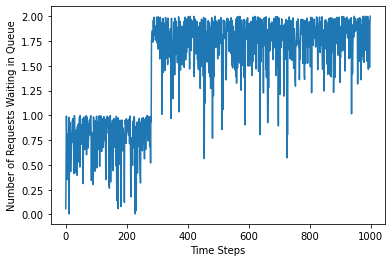

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_arrival, mu_service, num_time_steps):
    # Initialize time and request counters
    time = 0
    num_requests = 0
    num_requests_in_queue = []

    # Loop over each time step
    for t in range(num_time_steps):
        # Generate arrival time for next request using exponential distribution
        arrival_time = np.random.exponential(1/lambda_arrival)
        time += arrival_time

        # Increment number of requests and add to queue
        num_requests += 1

        # If the server is busy, add to queue
        if num_requests_in_queue:
            num_requests_in_queue[-1] -= arrival_time
            if num_requests_in_queue[-1] <= 0:
                num_requests_in_queue.pop()

        # If the server is free, start serving the request
        else:
            service_time = np.random.exponential(1/mu_service)
            num_requests_in_queue.append(service_time)

        # Add number of requests in queue for current time step
        num_requests_in_queue.append(num_requests - len(num_requests_in_queue))
    
    # Plot the number of requests waiting in queue over time
    plt.plot(num_requests_in_queue)
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Requests Waiting in Queue')
    plt.show()
    
# Simulate the M/M/1 queue for each arrival rate
for lambda_arrival in [1, 3, 4]:
    simulate_mm1_queue(lambda_arrival, 4, 1000)


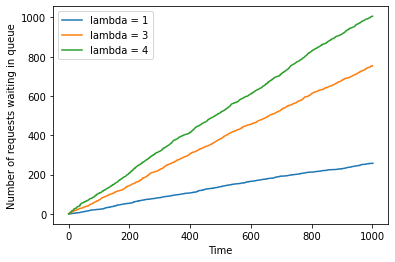

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1(lambda_, mew, time_limit):
    # Initialize variables
    time = 0
    requests = []
    waiting_times = []
    num_requests = 0
    total_waiting_time = 0

    while time < time_limit:
        # Generate arrival time for the next request
        arrival_time = np.random.exponential(scale=1/lambda_)
        time += arrival_time
        requests.append(time)

        # Check if the server is busy
        if num_requests > 0:
            waiting_time = np.random.exponential(scale=1/mew)
            total_waiting_time += waiting_time
            waiting_times.append(total_waiting_time)
        else:
            waiting_times.append(0)

        num_requests += 1

    return requests, waiting_times

# Set the time limit for the simulation
time_limit = 1000

# Set the arrival rates and the service rate
lambdas = [1, 3, 4]
mew = 4

# Simulate the M/M/1 queue for each arrival rate
for lambda_ in lambdas:
    requests, waiting_times = simulate_mm1(lambda_, mew, time_limit)

    # Plot the number of requests waiting in the queue as a function of time
    plt.plot(requests, waiting_times, label=f"lambda = {lambda_}")

plt.xlabel("Time")
plt.ylabel("Number of requests waiting in queue")
plt.legend()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define arrival rate and service rate
arrival_rate = [1, 3, 4]
service_rate = 4

# Define time range for simulation
time_range = np.arange(0, 1000, 0.01)

# Function to simulate arrival time of requests
def simulate_arrival_time(arrival_rate, time_range):
    interarrival_time = np.random.exponential(scale=1/arrival_rate, size=len(time_range))
    return np.cumsum(interarrival_time)

# Function to simulate number of requests waiting in the queue
def simulate_waiting_queue(arrival_time, service_rate, time_range):
    waiting_queue = np.zeros_like(time_range)
    service_time = np.random.exponential(scale=1/service_rate, size=len(arrival_time))
    completed_time = arrival_time + service_time
    for i in range(len(arrival_time)):
        waiting_queue[np.where(time_range >= arrival_time[i])[0][0]:np.where(time_range >= completed_time[i])[0][0]] += 1
    return waiting_queue

for rate in arrival_rate:
    arrival_time = simulate_arrival_time(rate, time_range)
    waiting_queue = simulate_waiting_queue(arrival_time, service_rate, time_range)
    
    # Plot the number of requests waiting in the queue as a function of time
    plt.plot(time_range, waiting_queue, label=f'Arrival Rate: {rate}')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Number of Requests Waiting in Queue')
plt.title('M/M/1 Queue Simulation')
plt.show()


IndexError: ignored